EXPLORATORY  DATA ANALYSIS ON RISK FACTORS OF HEART DISEASES IN MICHIGAN OVER YEARS

Cardiovascular disease (CVD) is Michigan’s number one killer. In fact, Michigan consistently ranks high among states with the worst rates of CVD.

**OBJECTIVE**: To know various risk factors that are contributing for heart disesases in michigan.

In [ ]:
!pip install seaborn --upgrade
!pip install --upgrade lxml
import pandas as pnd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from textwrap import wrap
%matplotlib inline

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)
Requirement already up-to-date: lxml in /usr/local/lib/python3.6/dist-packages (4.2.5)


####Data  sources:

- https://catalog.data.gov/dataset/500-cities-local-data-for-better-health-2016-release-7a5c9

- https://catalog.data.gov/dataset/nutrition-physical-activity-and-obesity-policy-and-environmental-data-3f4c7

- https://catalog.data.gov/dataset/behavioral-risk-factor-data-tobacco-use-2011-to-present-e0ad1

- https://catalog.data.gov/dataset/behavioral-risk-factor-data-heart-disease-amp-stroke-prevention-67c1f

- https://catalog.data.gov/dataset/age-adjusted-death-rates-for-the-top-10-leading-causes-of-death-united-states-2013

- https://storage.googleapis.com/dse6000_anupama/scraped_yelp_results_for_FastFood2.csv



In [ ]:
deathCauses=pnd.read_csv(r"https://storage.googleapis.com/dse6000/NCHS_-_Leading_Causes_of_Death__United_States.csv")
riskFactorNutrition= pnd.read_csv(r"https://storage.googleapis.com/dse6000/Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv")
heartData = pnd.read_csv(r'https://storage.googleapis.com/dse6000/Risk_factors_michigan.csv')
citiesData = pnd.read_csv(r'https://storage.googleapis.com/dse6000/500_Cities__Local_Data_for_Better_Health__2018_release.csv')
tobacoFactor= pnd.read_csv(r"https://storage.googleapis.com/dse6000/Behavioral_Risk_Factor_Data__Tobacco_Use__2011_to_present_.csv")
fastFoodRestaurants= pnd.read_csv(r"https://storage.googleapis.com/dse6000/scraped_yelp_results_for_FastFood2.csv",encoding = "ISO-8859-1")







####Data Cleaning Steps:
1.To plot graphs accurately with correct data types, converted the datatypes of columns Deaths and Age-adjusted Death Rate to integer and float types respectively.

2.Replaced _ with null string which makes us easy to access the column names

3.Dropped some columns which are not required for our analysis.


 There are further more data cleaning steps which are done in our analysis on the go  to accurately analyse the data.

In [ ]:
deathCauses['Deaths']=deathCauses['Deaths'].str.replace(',', '').astype('int')
deathCauses['Age-adjusted Death Rate']=pnd.to_numeric(deathCauses['Age-adjusted Death Rate'],errors='coerce')
heartData.columns=heartData.columns.str.replace("_","")
heartData.drop(["Datasource","PriorityArea1","PriorityArea2","PriorityArea3","PriorityArea4","BreakoutCategoryID","BreakOutID","LocationID"],inplace=True,axis=1)



We are beginning our analysis with understanding the trend of death rates due to Heart diseases. deathCauses dataframe information and top 5 rows are listed below.

In [ ]:
deathCauses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10296 entries, 0 to 10295
Data columns (total 6 columns):
Year                       10296 non-null int64
113 Cause Name             10296 non-null object
Cause Name                 10296 non-null object
State                      10296 non-null object
Deaths                     10296 non-null int64
Age-adjusted Death Rate    10268 non-null float64
dtypes: float64(1), int64(2), object(3)
memory usage: 482.7+ KB


In [ ]:
deathCauses.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2755,55.5
1,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,439,63.1
2,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4010,54.2
3,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1604,51.8
4,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,California,13213,32.0



Next, we are interested in cardiovascular diesease death rate for entire United States and compare it with Michigan state over the years.


Text(0.5,1,'Age-adjusted Death Rate due to heart disease in Michigan and US residents ')

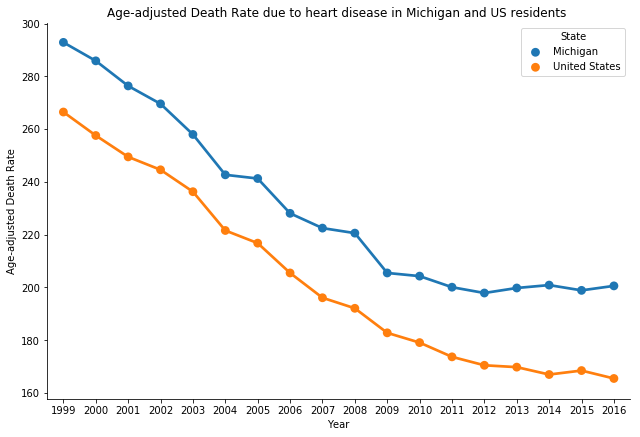

In [ ]:
deathCauses=deathCauses[(deathCauses['Cause Name']=='Heart disease')&((deathCauses['State']=='United States')|(deathCauses['State']=='Michigan'))]

year_data = pnd.DataFrame(deathCauses.groupby(['Year','State'])['Deaths'].mean()).reset_index()

sb.catplot(x="Year", y="Age-adjusted Death Rate",
           hue='State',
            data=deathCauses, kind="point", ci=None,legend_out=False,
            height=6, aspect=1.5)
plt.title('Age-adjusted Death Rate due to heart disease in Michigan and US residents ')

The above plot shows us that Michigan State has more death rate than the national average which is an alarming situation for people to focus on their lifestyle.In the plot, eventhough there is good decreasing rate , there is small increase and increase in percentage over the years 2011-2016. 

###We will analyze the risk factors that are causing the cardiovascular diseases in michigan.
For this analysis, heartData data set is used and filtered to contain only risk factors information .

In [ ]:
riskFactors=heartData[(heartData['LocationAbbr']=='MI')& (heartData['Category']=='Risk Factors')]

In [ ]:
riskFactors['Topic'].unique()

array(['Cholesterol Abnormalities', 'Diabetes', 'Nutrition', 'Obesity',
       'Physical Inactivity', 'Smoking', 'Hypertension'], dtype=object)

The above code lists out the health problems  such as Obesity,Hypertension  are making people prone to heart diseases.
Which factor is reported to be the most influencing factor can be answered by below graph.


Text(0,0.5,'Risk Factors')

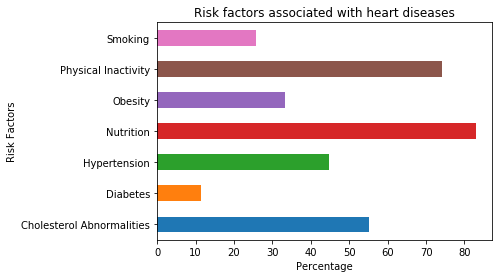

In [ ]:
riskFactors=riskFactors[riskFactors["DataValueTypeID"]=='AgeStdz']
riskFactors=riskFactors[riskFactors['BreakOutCategory'] != 'Overall']
riskFactors.groupby(['Topic'])['DataValue'].mean().plot(kind='barh')
plt.title("Risk factors associated with heart diseases")
plt.xlabel("Percentage")
plt.ylabel("Risk Factors")

The above plot depicts us that physical inactivity and lack of nutrition are the major causes for heart problems in michigan . Now let us concentrate on each risk factor and know how michigan state is reported these over years.

####Many epidemiological studies have indicated a protective role for a diet rich in fruits and vegetables against the development and progression of cardiovascular disease (CVD), one of the leading causes of morbidity and mortality worldwide. Physical inactivity and unhealthy eating contribute to  CVD conditions.

So exploring nuriskFactorNutrition data set given by BRFSS which surveyed people across the michigan and recorded thier healthy habits such as nutritious food intake,good amount of physical activity and obesity. 



####Physical Inactivity
####ASSUMPTION:

We are assuming that lack of proper physical activity may lead to cardiovascular disease and check what is the activity level of michigan state over years.

In [ ]:
riskFactorNutrition=riskFactorNutrition[(riskFactorNutrition['LocationAbbr']=='MI')&(
                                     (riskFactorNutrition['YearStart']==2011)|(riskFactorNutrition['YearStart']==2013)|(riskFactorNutrition['YearStart']==2015))]

In [ ]:

physicalActivity=riskFactorNutrition[(riskFactorNutrition['Class']=='Physical Activity') & (riskFactorNutrition['Total']=='Total') ]

Data cleaning:

As we are analyzing the percentages of physical activities, we are replacing the long questions to short terms for better interpretability.



In [ ]:
physicalActivity=physicalActivity.replace(['Percent of adults who engage in no leisure-time physical activity','Percent of adults who engage in muscle-strengthening activities on 2 or more days a week','Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)','Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)','Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week'],['no physical activity','low intense activities','medium intense activities','high intense activities','moderate intense activities'])

Plotting the graph to understand the trend of how vigourosly physical activities are done by residents of michigan.

Text(43.5347,0.5,'Percentage')

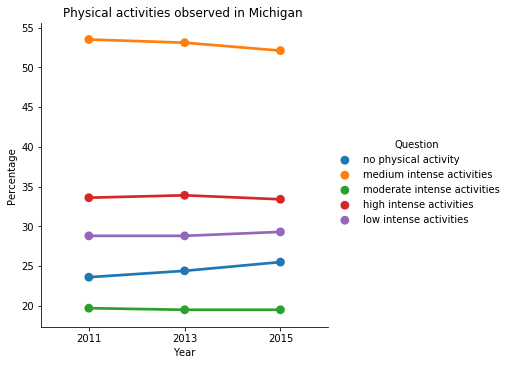

In [ ]:
labels = [ '\n'.join(wrap(l, 150)) for l in physicalActivity['Question']]
sb.catplot(x="YearStart", y="Data_Value", hue="Question",kind='point', ci=None,data=physicalActivity)
plt.title("Physical activities observed in Michigan ")
plt.xlabel("Year")
plt.ylabel("Percentage")


From the above plot it is clear that the percentage of poeple who do medium intensity workout are more over the years than who do high intensity workout. No physical inactivity also shows a significant percentage due to which poeple are more prone to cardiovascular diseases. People who are inactive has increased from 2013 to 2015 which is a warning sign.


###Lack of Nutrition

####ASSUMPTION

Diet is an important risk factor in  heart disease. Food-related risk factors include obesity, high blood pressure, uncontrolled diabetes and a diet high in saturated fats. A low-saturated fat, high-fibre, high plant food diet can substantially reduce the risk of developing heart disease. We are assuming that poeple who eat less fruits and vegetables are more prone to cardiovascular diseases

In [ ]:


#riskFactorNutrition=riskFactorNutrition[(riskFactorNutrition['LocationAbbr']=='MI')]

In [ ]:
nutritionData=riskFactorNutrition[(riskFactorNutrition['Class']=='Fruits and Vegetables') & (riskFactorNutrition['Total']=='Total') ]

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(85.5278,0.5,'Percentage')

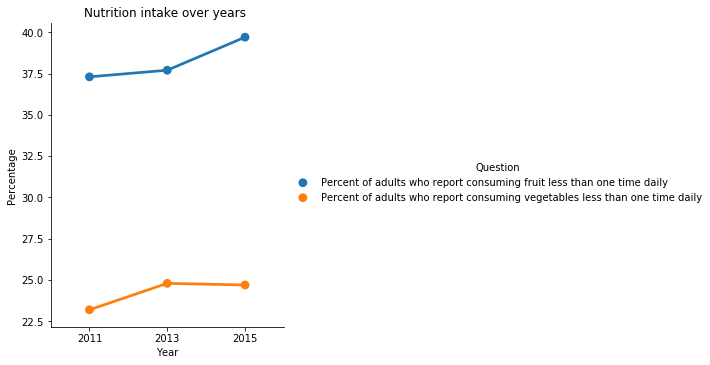

In [ ]:
'''
sb.barplot(x="YearStart", y="Data_Value", hue="Question", ci=None,
            data=nutritionData)
plt.title("Nutrition intake over years ")
plt.xlabel("Year")
plt.ylabel("Percentage")

'''



labels = [ '\n'.join(wrap(l, 150)) for l in nutritionData['Question']]

sb.factorplot(x="YearStart", y="Data_Value", hue="Question", ci=None,
            data=nutritionData)
plt.title("Nutrition intake over years ")
plt.xlabel("Year")
plt.ylabel("Percentage")




The above plot show us that the percentage of poeple who eat fruits and vegetables less than one time daily are pretty high due to which people of michigan are prone to high cardiovascular diseases.

###Obesity
Obesity is becoming a global epidemic in both children and adults.In fact, obesity is an independent risk factor for CVD, and CVD risks have also been documented in obese children. Obesity is associated with an increased risk of morbidity and mortality as well as reduced life expectancy.
###Assumption:
We are assuming that obesity may be one of the cause for cardiovascular disease and so we are analysing the percentage of poeple who are obese in michigan 


In [ ]:
obesityData=riskFactorNutrition[(riskFactorNutrition['Class']=='Obesity / Weight Status') & (riskFactorNutrition['Total']=='Total')]

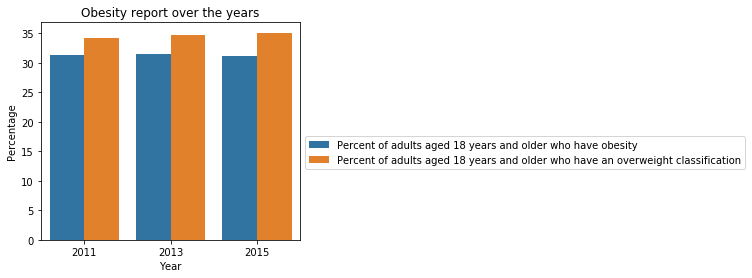

In [ ]:
'''
sb.barplot(x="YearStart", y="Data_Value", hue="Question", ci=None,
            data=obesityData)
plt.title("Obesity report over the years")
plt.xlabel("Year")
plt.ylabel("Percentage")
'''

fig, ax = plt.subplots()

labels = [ '\n'.join(wrap(l, 150)) for l in obesityData['Question']]

sb.barplot(x="YearStart", y="Data_Value", hue="Question", ci=None,
            data=obesityData)
plt.title("Obesity report over the years")
plt.xlabel("Year")
plt.ylabel("Percentage")

ax.legend(labels, bbox_to_anchor=(1, 0.5))
ax.grid(False)

plt.subplots_adjust(left=0.1, right = 0.7)
plt.show()


From the above plot we found out that the percentage of poeple aged 18 years and above is high and this may be one of the reason why michigan state people are more towards cardiovascular disease.

###Tobacco Intake
Smoking is a major cause of cardiovascular disease (CVD) and causes
approximately one of every four deaths from CVD.Even people who smoke fewer than five cigarettes a day may show signs of early CVD. The risk of CVD increases with the number of cigarettes smokedper day, and when smoking continues for many years. Smoking cigarettes
with lower levels of tar or nicotine does not reduce the risk for cardiovascular
disease.

###Assumption:
We are assuming that smoking is also one of the major cause for CVD. So we are finding how smoking habit has changed over years.



In [ ]:
tobacoFactor=tobacoFactor[(tobacoFactor['LocationAbbr']=='MI') &(tobacoFactor['MeasureDesc']=='Current Smoking')]

Plotting the trend graph to understand percentage amount of decrease or increase in current smokers in michigan and correlate with the heart disease trend.

Text(0.3,0.5,'Percentage')

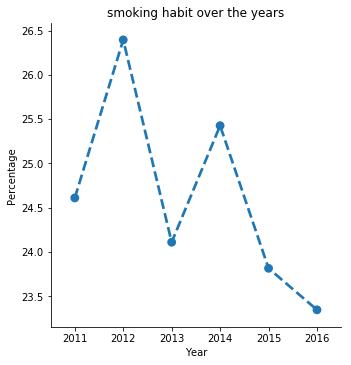

In [ ]:
sb.catplot(x="YEAR", y="Data_Value", ci=None,
            data=tobacoFactor,kind='point',linestyles=["--"])
plt.title("smoking habit over the years")
plt.xlabel("Year")
plt.ylabel("Percentage")

The above graph shows people are adopting healthy habits as there is good amount of decline in percentage of smokers in michigan, which can keep them from major heart risks. 

####Obesity and heart diseases reported by various Cities in Michigan

Here, we are exploring citiesData data set and analyse which cities are reporting higher percentage of Obesity and Heart disease.

In [ ]:
cityHeart=citiesData[(citiesData['StateAbbr']=='MI')&(citiesData['Measure']=='Coronary heart disease among adults aged >=18 Years')&(citiesData['DataValueTypeID']=='AgeAdjPrv')]

In [ ]:
cityObesity=citiesData[(citiesData['StateAbbr']=='MI')&(citiesData['Measure']=='Obesity among adults aged >=18 Years')&(citiesData['DataValueTypeID']=='AgeAdjPrv')]

cityHeart data set contains list of  cities with thier percentage of Heart disease reported. Plotting the data to check which city is in the top of the list for year 2016.

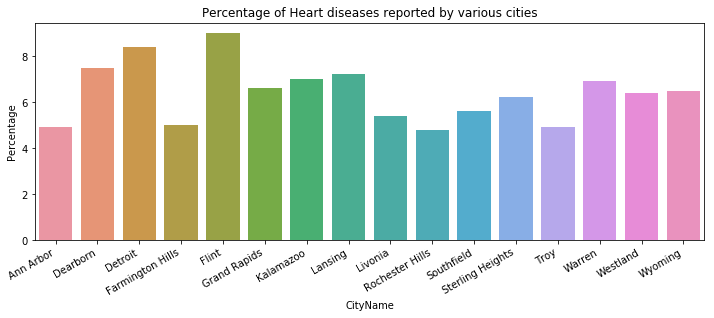

In [ ]:
plt.figure(figsize=(12,4))
# plot chart

ax=sb.barplot(data=cityHeart,x='CityName', y = 'Data_Value')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.title("Percentage of Heart diseases reported by various cities")
plt.ylabel("Percentage")
plt.show()

Above grapg shows Flint has highest number of heart disease  reported  and Detroint is in the 2nd position.

Next, checking for city which reported the highest obesity percentage .

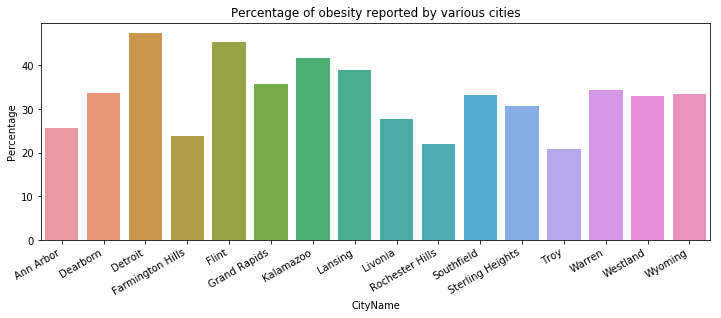

In [ ]:
plt.figure(figsize=(12,4))
# plot chart

ax=sb.barplot(data=cityObesity,x='CityName', y = 'Data_Value')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.title("Percentage of obesity reported by various cities")
plt.ylabel("Percentage")
plt.show()



Top 3 cities which reported highest obesity is Detroit,Flint and Kalamazoo.It may be because of residents un healthy diet ,hereditary and physical activities .

The above two plots depicts that cities which are more prone to cardiovascular disease are also the cities with highest obesity rate.

Studies have shown that over the past four decades, consumption of food eaten away from home has also risen alarmingly. It is well known that eating out may lead to excess calorie intake and increases the risk of obesity because of large portion sizes and increased energy density of foods.

Presence of large number of fast food restaurants makes human beings easy access to unhealthy food. So to undrstand the cities with higher obesity may be due to presence of abundant access to fast food ,we scraped yelp website and listed out the fast food restaurants and thier ratings and saved it to file.

fastFoodRestaurants data set contains restaurant name,rating and city which the shop located in.
Lets assume that good rated restaurants draws more customers ,in turn causes obesity among people. 

In [ ]:
fastFoodRestaurants=fastFoodRestaurants[fastFoodRestaurants['rating']>=3]
fastFoodRestaurants = fastFoodRestaurants.groupby(['city','rating']).size().unstack()

To check the count of different rated fast food restaurants and compare it with other cities, ploting stacked bar plot.

Text(0,0.5,'count')

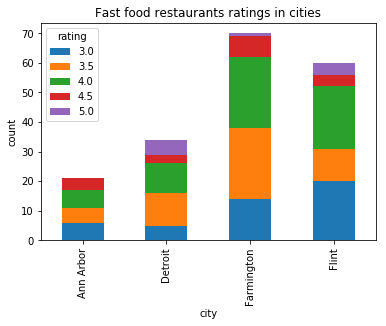

In [ ]:
fastFoodRestaurants.plot(kind='bar',stacked='true')
plt.title('Fast food restaurants ratings in cities')
plt.ylabel('count')

The above plot shows there exists good number of fast food dinning options in all the 4 cities . Detroit and Flint has good number of restaurants rated 3.5 and 4 ,which may be making them top in the list of obesity reported cities.

###Conclusion:
<br>

1.Michigan's death rate is decreasing in good rate over the years.But its above the national average.

2.Tobacco is the only risk factor which has decreased over years. Rest of the risk factors shows an increase in the years which is  not a good sign and this may be one of the reason for increase in death rates in michigan.

3.We can assume good rated fast food restaurants in various cities drwaing more customers,which may be associated with high obesity percentages in those cities.

By seeing above analysis, we believe more awareness regarding healthy lifestyle need to be created among people so that there will be more reduction in number of deaths caused due to cardio vascular problems.


Below is the code for  Scraping yelp website to list out fast food restaurants in Ann Arbor, Flint,Detroit and Farmington Hills.

In [ ]:
from IPython.core.debugger import set_trace
from lxml import html  
import csv
import requests
from random import randint
from time import sleep
#from exceptions import ValueError
from time import sleep
import re
import argparse

scraped_datas=[]
MAX_SLEEP = 20000 
def page_to_index(start,end,step):
    while start <= end:
        yield start
        start += step
        
def urls(base_url):
    url_list = []
    cities=['Ann%20Arbor%20MI','Farmington%20Hills%20MI','Detroit%20MI','Flint%20MI']
    for i in cities:
        url=base_url+i+'&ns=1&start='
        for x in page_to_index(0, 120, 30):
            newurl=url+str(x)
            url_list.append(newurl)
    return url_list

def r_sleep():


    length = float(randint(2000, MAX_SLEEP)) / 1000
    sleep(length)
    print('slept')
    
def parse(url):
    headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/42.0.2311.90 Safari/537.36'}
    response = requests.get(url, headers=headers, verify=False).text
    parser = html.fromstring(response)
    listing = parser.xpath("//li[@class='regular-search-result']")
    total_results = parser.xpath("//span[@class='pagination-results-window']//text()")
    
    
    print(total_results)
    
    for results in listing:
        raw_position = results.xpath(".//span[@class='indexed-biz-name']/text()")	
        raw_name = results.xpath(".//span[@class='indexed-biz-name']/a//text()")
        raw_ratings = results.xpath(".//div[contains(@class,'rating-large')]//@title")
        raw_review_count = results.xpath(".//span[contains(@class,'review-count')]//text()")
        raw_price_range = results.xpath(".//span[contains(@class,'price-range')]//text()")
        category_list = results.xpath(".//span[contains(@class,'category-str-list')]//a//text()")
        raw_address = results.xpath(".//address//text()")
        name = ''.join(raw_name).strip()
       
        cleaned_reviews = ''.join(raw_review_count).strip()
        reviews =  re.sub("\D+","",cleaned_reviews)
        categories = ','.join(category_list) 
        cleaned_ratings = ''.join(raw_ratings).strip()
        if raw_ratings:
            ratings = re.findall("\d+[.,]?\d+",cleaned_ratings)[0]
        else:
            ratings = 0
        price_range = len(''.join(raw_price_range)) if raw_price_range else 0
        address  = ' '.join(' '.join(raw_address).split())
        
        if 'Detroit' in url:
            city='Detroit'
        elif 'Farmington' in url:
            city='Farmington'
        elif 'Flint' in url:
            city='Flint'
        else:
            city='Ann Arbor'
                
        
            
        data={
                'business_name':name,
                'review_count':reviews,
                'categories':categories,
                'rating':ratings,
                'address':address,
                'city':city
                }
        scraped_datas.append(data)
       
    return scraped_datas

if __name__=="__main__":
    
    yelp_urls  = urls("https://www.yelp.com/search?find_desc=Fast%20Food&find_loc=")
    
    for yelp_url in yelp_urls:
        
        
        scraped_data = parse(yelp_url)
        
    
    print ("Writing data to output file")
    with open("scraped_yelp_results_for_FastFood2.csv","w") as fp:
        fieldnames= ['business_name','rank','review_count','categories','rating','address','city']
        writer = csv.DictWriter(fp,fieldnames=fieldnames)
        writer.writeheader()
        for data in scraped_data:
            writer.writerow(data)

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


[]


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


[]


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


[]


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


[]


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


[]


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


[]


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


[]


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


[]


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


[]


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


[]


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


[]


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


[]


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


[]


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


[]


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


[]


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


[]


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


[]


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


[]


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


[]


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


[]
Writing data to output file
